<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/keras_barebones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Classification Example with Keras

## by Fayyaz Minhas

This is a "barebones" example with Keras in which we train a simple neural network and visualize its decision boundary.

Let's load some visualization code first (You don't need to understand this part!).


In [0]:
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-eps, np.max(X[:,d0])+eps
        miny, maxy = np.min(X[:,d1])-eps, np.max(X[:,d1])+eps
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None or len(conts)<2:
            #conts = list(classes)
            vmin,vmax = classes[0]-eps,classes[-1]+eps
        else:            
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None or len(conts)<2:            
            conts = sorted([-1+eps,0,1-eps])
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 50)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent

Let's create some data

In [0]:
X = np.array([[-1,0],[0,1],[4,4],[2,3]])
y = np.array([-1,-1,+1,+1])

Let's make a simple neural network with 2 neurons in the hidden layer. Each neuron takes 2 inputs (the two features) and the output of the two neurons is fed to a single output neuron. 

We use MSE as the loss function with a gradient descent based optimizer. We run the optimizer for 1000 epochs with a batch size of 2 (i.e., two examples are picked, their error computed and weights updated at once).

In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2,input_dim=2,init='uniform',activation='relu'))
model.add(Dense(1,init='uniform',activation='linear'))
model.compile(loss = 'mse',optimizer='adam',metrics=['accuracy'])
model.fit(X,y,nb_epoch = 1000, batch_size = 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, input_dim=2, activation="relu", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/1000
4/4 [==============================] - 0s 92ms/step - loss: 1.0017 - acc: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 730us/step - loss: 1.0014 - acc: 0.0000e+00
Epoch 3/1000
4/4 [==============================] - 0s 515us/step - loss: 1.0012 - acc: 0.0000e+00
Epoch 4/1000
4/4 [==============================] - 0s 403us/step - loss: 1.0009 - acc: 0.0000e+00
Epoch 5/1000
4/4 [==============================] - 0s 377us/step - loss: 1.0007 - acc: 0.0000e+00
Epoch 6/1000
4/4 [==============================] - 0s 560us/step - loss: 1.0005 - acc: 0.0000e+00
Epoch 7/1000
4/4 [==============================] - 0s 381us/step - loss: 1.0003 - acc: 0.0000e+00
Epoch 8/1000
4/4 [==============================] - 0s 355us/step - loss: 1.0001 - acc: 0.0000e+00
Epoch 9/1000
4/4 [==============================] - 0s 400us/step - loss: 0.9999 - acc: 0.0000e+00
Epoch 10/1000
4/4 [==============================] - 0s 409us/step - loss: 0.9998 - acc: 0.0000e+00
Epoch 11/1

We then determine the output over training examples.

In [27]:
predictions = model.predict(X)
print(predictions)

[[-1.2274415 ]
 [-0.5307533 ]
 [ 0.8947075 ]
 [ 0.86262316]]


We now visualize the output of the neural network.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: The following kwargs were not used by contour: 'label'


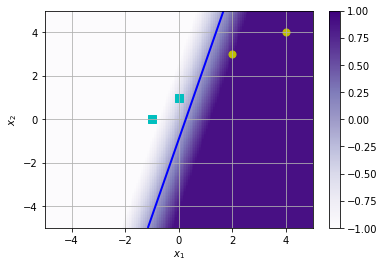

[-5, 5, -5, 5]

In [28]:
plotit(X,y,clf=model.predict,conts=[0],extent = [-5,+5,-5,+5])

What you can do:
Change the structure of the neural network (number of neurons, layers, activation functions, epochs, batch size, etc.) and see how it affects the final output.